# SIR MODEL FOR COVID_19 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate
import seaborn as sns

## File paths

In [2]:
covid_19_deaths = "Covid_deaths.csv"
covid_19_infected = "Covid_confirmed.csv"
covid_19_recovered = "Covid_recovered.csv"
covid_19_removed = "Covid19_removed.csv"
sir_model_prediction = "SIR MODEL.xlsx"

In [3]:
deaths_df = pd.read_csv(covid_19_deaths)
recovered_df = pd.read_csv(covid_19_recovered)
confirmed_df = pd.read_csv(covid_19_infected)
removed_df = pd.read_csv(covid_19_removed)
sir_model_df = pd.read_excel(sir_model_prediction)


## Formulas 
## $S$ + $I$ + $R$ = $N$

Where :

$S$ = Susceptible population

$I$ = Infected population

$R$ = Recovered/Dead population

$N$ = Total Population


## Data 

### Mean Infectious Period : 11 days 

Backer, Jantien A et al. “Incubation period of 2019 novel coronavirus (2019-nCoV) infections among travellers from Wuhan, China, 20-28 January 2020.” Euro surveillance : bulletin Europeen sur les maladies transmissibles = European communicable disease bulletin vol. 25,5 (2020): 2000062. doi:10.2807/1560-7917.ES.2020.25.5.2000062

#### Rate of  Removal (Death/Recovery) = 0.11 (Recovery) + 0.034 (Mortality) = 0.144

https://www.worldometers.info/coronavirus/coronavirus-death-rate/


https://www.sciencedirect.com/science/article/pii/S1201971220300539




<img src="sirimage.png">

In [5]:
full_covid_df = pd.read_csv("full_data.csv")

In [6]:
full_covid_df

,Unnamed: 0,Time,Confirmed,Removed,Total_Population,Susceptible
0,0,1/22/20,555,45,7000000000,6999999400
1,1,1/23/20,654,48,7000000000,6999998698
2,2,1/24/20,941,62,7000000000,6999997695
3,3,1/25/20,1434,81,7000000000,6999996180
4,4,1/26/20,2118,108,7000000000,6999993954
...,...,...,...,...,...,...
70,70,4/1/20,932605,239986,7000000000,6984701310
71,71,4/2/20,1013157,263246,7000000000,6983424907
72,72,4/3/20,1095917,284583,7000000000,6982044407
73,73,4/4/20,1197405,310758,7000000000,6980536244


#### Comparing the SIR model and Real data

In [7]:
#sir_model_df.drop(sir_model_df.columns[sir_model_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [8]:
sir_model_df

,Days,Susceptible Population,Infected population,Removed population,dS/dt,dI/dt,dR/dt,Total population,Recovery Rate,Transmission Rate
0,0,6.999999e+09,555.000000,4.500000e+01,-135.974988,56.054988,79.920000,7.000000e+09,0.144,3.500000e-11
1,1,6.999999e+09,611.054988,1.249200e+02,-149.708456,61.716538,87.991918,7.000000e+09,0.144,3.500000e-11
2,2,6.999999e+09,672.771526,2.129119e+02,-164.829003,67.949903,96.879100,7.000000e+09,0.144,3.500000e-11
3,3,6.999999e+09,740.721430,3.097910e+02,-181.476723,74.812837,106.663886,7.000000e+09,0.144,3.500000e-11
4,4,6.999999e+09,815.534267,4.164549e+02,-199.805860,82.368926,117.436934,7.000000e+09,0.144,3.500000e-11
...,...,...,...,...,...,...,...,...,...,...
361,361,2.112788e+09,1230.131786,4.887211e+09,-90.965252,-86.173726,177.138977,7.000000e+09,0.144,3.500000e-11
362,362,2.112788e+09,1143.958061,4.887211e+09,-84.592911,-80.137050,164.729961,7.000000e+09,0.144,3.500000e-11
363,363,2.112787e+09,1063.821010,4.887212e+09,-78.666968,-74.523258,153.190226,7.000000e+09,0.144,3.500000e-11
364,364,2.112787e+09,989.297753,4.887212e+09,-73.156152,-69.302724,142.458876,7.000000e+09,0.144,3.500000e-11


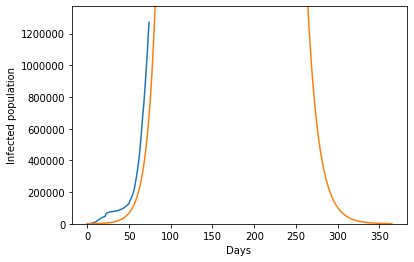

In [31]:
plt.ylim(0, 1372115)
sns.lineplot(x=sir_model_df["Days "], y=full_covid_df["Confirmed"])
sns.lineplot(x=sir_model_df["Days "], y=sir_model_df["Infected population"] )

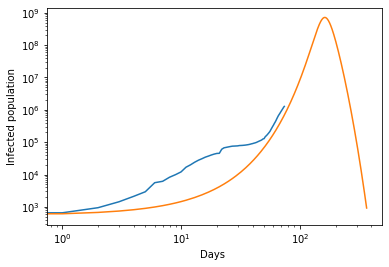

In [14]:
plt.xscale('log')
plt.yscale('log')
#plt.ylim(0, 1372115)
sns.lineplot(x=sir_model_df["Days "], y=full_covid_df["Confirmed"])
sns.lineplot(x=sir_model_df["Days "], y=sir_model_df["Infected population"] )

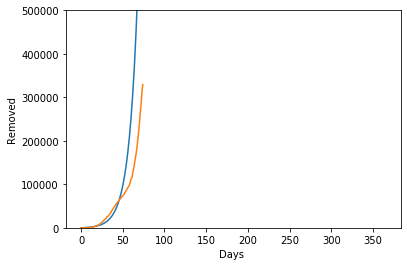

In [28]:
plt.ylim(0, 500000)
sns.lineplot(x=sir_model_df["Days "], y=sir_model_df["Removed population"])
sns.lineplot(x=sir_model_df["Days "], y=full_covid_df["Removed"] )

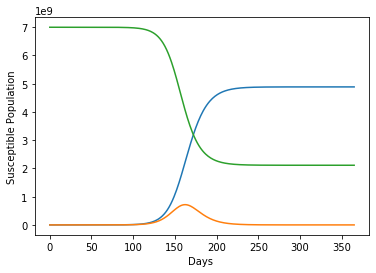

In [19]:
sns.lineplot(x=sir_model_df["Days "], y=sir_model_df["Removed population"])
sns.lineplot(x=sir_model_df["Days "], y=sir_model_df["Infected population"] )
sns.lineplot(x=sir_model_df["Days "], y=sir_model_df["Susceptible Population"] )

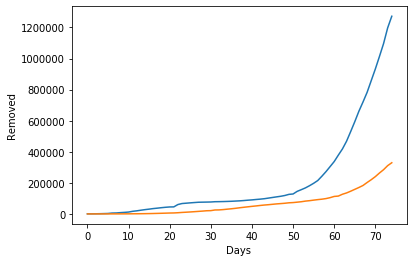

In [12]:
sns.lineplot(x=sir_model_df["Days "], y=full_covid_df["Confirmed"])
sns.lineplot(x=sir_model_df["Days "], y=full_covid_df["Removed"])
#sns.lineplot(x=sir_model_df["Days "], y=full_covid_df["Susceptible"] )

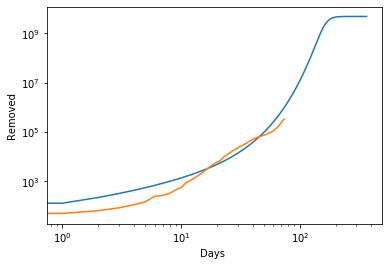

In [32]:
plt.xscale('log')
plt.yscale('log')
sns.lineplot(x=sir_model_df["Days "], y=sir_model_df["Removed population"])
sns.lineplot(x=sir_model_df["Days "], y=full_covid_df["Removed"])

